<a href="https://colab.research.google.com/github/Fuenfgeld/DataManagement/blob/main/DataManagementBootcamp/DataManagementBootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example data analyse for scikit diabetes data

## import required libraries

In [1]:
import sklearn.datasets as ds
import sklearn as skl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## load data and labels from scikit-learn

In [2]:
diabetesDS = ds.load_diabetes(as_frame=True)

In [3]:
for i in diabetesDS:
    print(i)

data
target
frame
DESCR
feature_names
data_filename
target_filename
data_module


In [4]:
x = np.array([2,2,3,2,1])
b = (x - np.mean(x)) / np.std(x) / 5

## print the the full description of the dataset

- age, sex, body mass index, average blood pressure, six blood serum measurements -> numeric predictive values
- quantitative measure of disease progression
- total of 442 samples

**Each of these 10 feature** variables have been mean centered and scaled by the standard deviation times n_samples

Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

In [5]:
print(diabetesDS.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## data exploration

### simple statistics

In [6]:
df = pd.DataFrame(diabetesDS.data, columns=diabetesDS.feature_names) # load attribute in df
df.columns =  ['age','sex','bmi','bp','tc','ldl','hdl','tch','ltg','glu']
df['target'] = diabetesDS.target # add target values in df

In [7]:
df.head(5)

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [8]:
df.describe()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


### show sex ratio

0    235
1    207
dtype: int64

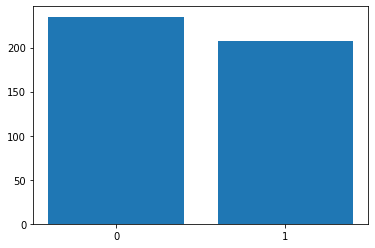

In [9]:
sex_df = pd.Categorical(df['sex'])
sex_df = sex_df.rename_categories(["0","1"]) # dosen't know which is female or male
plt.bar(["0","1"],sex_df.value_counts()) # show the ratio between male/female
sex_df.value_counts()

In [10]:
sex_df.value_counts()[0]

235

### show quantitative measure of disease progression ratio

(array([38., 80., 68., 62., 50., 41., 38., 42., 17.,  6.]),
 array([ 25. ,  57.1,  89.2, 121.3, 153.4, 185.5, 217.6, 249.7, 281.8,
        313.9, 346. ]),
 <BarContainer object of 10 artists>)

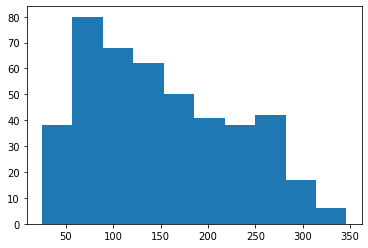

In [11]:
plt.hist(df['target'])

### covariance

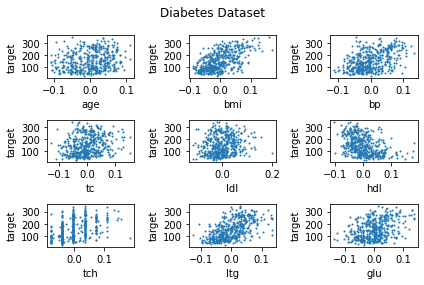

In [12]:
# sex is a norminal-scaled data and dosen't make sence to plot it here
features = list(df.columns)
target_feature = 'target'
features.remove('sex')
features.remove(target_feature)

# Plot
fig, axs = plt.subplots(3, 3)
fig.suptitle('Diabetes Dataset')
for i in range(3):
    for j in range(3):
        n = j + i * 3
        feature = features[n]
        axs[i, j].scatter(df[feature], df[target_feature], s=1)
        axs[i, j].set_xlabel(feature)
        axs[i, j].set_ylabel(target_feature)
plt.tight_layout()
plt.show()

In [13]:
def cov(X, Y):
    return (sum (x - np.mean(X)) * (y - np.mean(Y)) ) * 1/(n-1)

In [14]:
df.cov()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,target
age,0.002268,0.000394,0.000420,0.000761,0.000590,0.000497,-0.000170,0.000462,0.000614,0.000684,0.689758
sex,0.000394,0.002268,0.000200,0.000547,0.000080,0.000323,-0.000860,0.000753,0.000340,0.000472,0.158085
bmi,0.000420,0.000200,0.002268,0.000897,0.000566,0.000592,-0.000832,0.000938,0.001012,0.000881,2.152914
bp,0.000761,0.000547,0.000897,0.002268,0.000550,0.000421,-0.000405,0.000584,0.000892,0.000885,1.620729
tc,0.000590,0.000080,0.000566,0.000550,0.002268,0.002033,0.000117,0.001229,0.001169,0.000739,0.778355
ldl,0.000497,0.000323,0.000592,0.000421,0.002033,0.002268,-0.000445,0.001496,0.000722,0.000659,0.638967
hdl,-0.000170,-0.000860,-0.000832,-0.000405,0.000117,-0.000445,0.002268,-0.001675,-0.000904,-0.000621,-1.449309
tch,0.000462,0.000753,0.000938,0.000584,0.001229,0.001496,-0.001675,0.002268,0.001401,0.000946,1.580234
ltg,0.000614,0.000340,0.001012,0.000892,0.001169,0.000722,-0.000904,0.001401,0.002268,0.001054,2.077412
glu,0.000684,0.000472,0.000881,0.000885,0.000739,0.000659,-0.000621,0.000946,0.001054,0.002268,1.404133


In [15]:
# PCA here

### simple reggresion

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from numpy.polynomial.polynomial import polyfit

In [17]:
features = list(df.columns)
features.remove('target')
x = df[features]
y = df['target']

In [18]:
x_train,x_val,y_train,y_val = train_test_split(x,y,random_state=42)
x_train.shape,x_val.shape

((331, 10), (111, 10))

In [19]:
model = LinearRegression().fit(x_train,y_train)

In [20]:
pred = model.predict(x_val)

Text(0.5, 0, 'Ground truth')

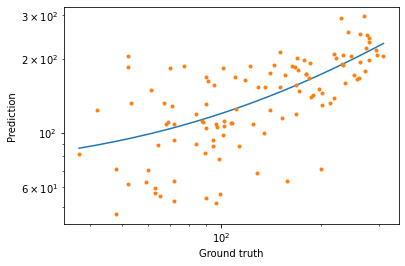

In [21]:
plt.plot(np.unique(y_val), np.poly1d(np.polyfit(y_val, pred, 1))(np.unique(y_val)))
plt.plot(y_val,pred,'.')

plt.yscale('log')
plt.xscale('log')
plt.ylabel('Prediction')
plt.xlabel('Ground truth')

## Orginal Data

- orginal data is provide by https://hastie.su.domains/Papers/LARS/diabetes.data

In [22]:
df_orginal = pd.read_csv("https://hastie.su.domains/Papers/LARS/diabetes.data",sep='\t')
df_orginal.columns =  ['age','sex','bmi','bp','tc','ldl','hdl','tch','ltg','glu','target']

In [23]:
df_orginal.head(5)

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,target
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


### What are the range of the data? Missing Metadata...

The descripion of the measurment values where not given. A reference list can be found here https://www.amboss.com/de/referenzwertliste/H13.pdf. (Information provided without guarantee)

- bmi, body mass index, 18,5-< 25.
- bp, average blood pressure, -
- tc, total serum cholesterol, ≤200 mg/dL
- ldl, low-density lipoproteins, <155 mg/dL
- hdl, high-density lipoproteins, >35 mg/dL
- tch, total cholesterol / HDL, ≤ 5,2 mmol/L
- ltg, possibly log of serum triglycerides level, ≤2,3 mmol/L
- glu, blood sugar level, 55-100 mg/dL

In [24]:
bmi_threshold_overweight = 25
bmi_threshold_underweight = 18.5

In [25]:
df_orginal.describe()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,target
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [28]:
bmi_df = df_orginal['bmi']
bool_of_overweight = bmi_df>bmi_threshold_overweight
bool_of_underweight = bmi_df<bmi_threshold_underweight
bool_of_normalweight= bmi_df.between(bmi_threshold_underweight,bmi_threshold_overweight)
print("Anzahl übergewichtiger Personen", np.sum(bool_of_overweight))
print("Anzahl untergewichtiger Personen", np.sum(bool_of_underweight))
print("Anzahl normalgewichtiger Personen", np.sum(bool_of_normalweight))

Anzahl übergewichtiger Personen 252
Anzahl untergewichtiger Personen 2
Anzahl normalgewichtiger Personen 188


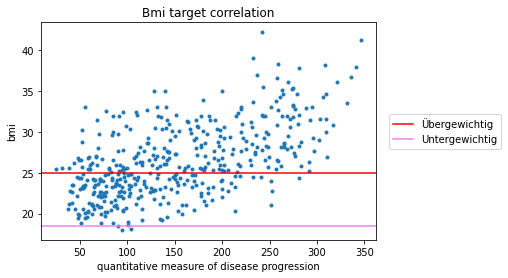

In [44]:
plt.title("Bmi target correlation")
plt.plot(df_orginal['target'],df_orginal['bmi'],'.')
plt.ylabel('bmi')
plt.xlabel('quantitative measure of disease progression')
plt.axhline(y=bmi_threshold_overweight, color='r', linestyle='-',label='Übergewichtig')
plt.axhline(y=bmi_threshold_underweight, color='violet', linestyle='-',label='Untergewichtig')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)